# Kaggle_Health Insurance Cross Sell Prediction

## 1. Introduction/Business Problem

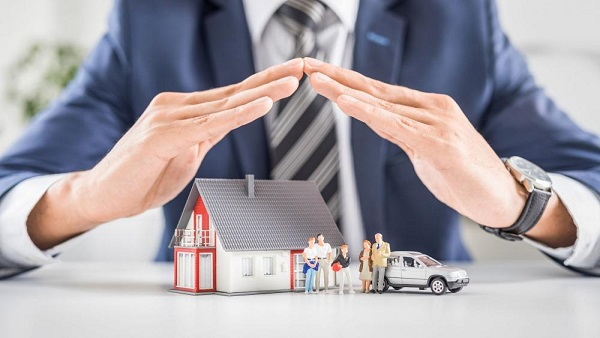

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.
For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. 

For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.
Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.
Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.


## The topics of the Work

The work includes the topic for the common topic of data science, covering:

1.	Exploratory Data Analysis
2.	The Use of Random Forest Classifier
3.	The Use of Feature Importance
4.	The Use of Randomized Search for Random Forest
5.	The Use of Randomized Search for XG Boost
6.	Reference


In [25]:
import re
import sys
import time
import datetime
import pandas as pd
import matplotlib.pyplot as plt
#import tensorflow as tf
import pickle
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import linear_model
import statsmodels.api as sm
import sklearn.model_selection as ms
from sklearn import neighbors
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.neighbors import KDTree
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score, ShuffleSplit
from sklearn.model_selection import StratifiedKFold,KFold,GridSearchCV,RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error,confusion_matrix,classification_report,roc_auc_score, roc_curve, accuracy_score, f1_score

from xgboost import XGBClassifier
from xgboost import XGBRegressor 
from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor 

localtime = time.asctime( time.localtime(time.time()) )
timeshow =  time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()) 


In [26]:
database = pd.read_csv(r"C:\Users\Anson\Desktop\PythonApplication_anson\3_Kaggle\2_Health Insurance Cross Sell Prediction\Info\train.csv")

In [27]:
localtime = time.asctime( time.localtime(time.time()) )
timeshow =  time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()) 

In [28]:
database = pd.read_csv(r"C:\Users\Anson\Desktop\PythonApplication_anson\3_Kaggle\2_Health Insurance Cross Sell Prediction\Info\train.csv")

In [29]:
database.info()
database.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


## 2. Exploratory Data Analysis

### a) Response from the Customer

### Count Plot for the Analysis

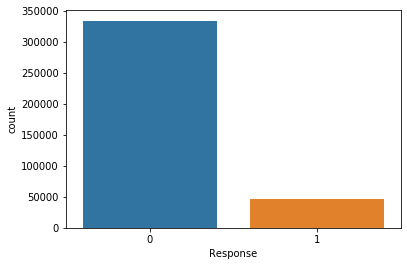

0    334399
1     46710
Name: Response, dtype: int64


In [30]:
sns.countplot(database['Response'])
plt.show()
print(database['Response'].value_counts())

### Response from the Customer in Gender

Male      206089
Female    175020
Name: Gender, dtype: int64


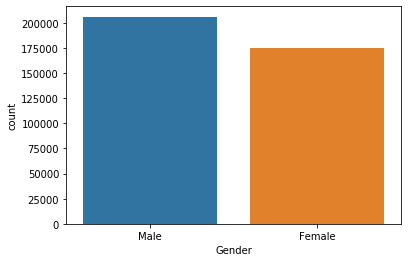

In [31]:
sns.countplot(database['Gender'])
print(database['Gender'].value_counts())

### b) Distribution of Age and Annual Premium


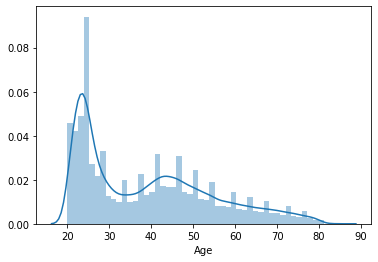

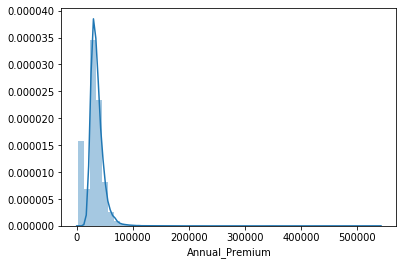

In [32]:
sns.distplot(database['Age'])
plt.show()
sns.distplot(database['Annual_Premium'])
plt.show()


### c) Distribution of Age vs Annual Premium

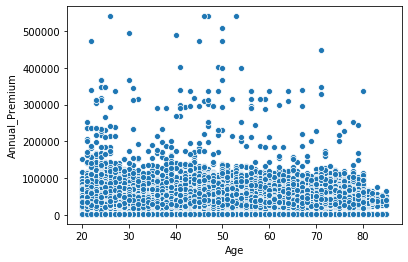

In [33]:
sns.scatterplot( x=database['Age'], y=database['Annual_Premium'])
plt.show()

### d) Vehicle Age and Response

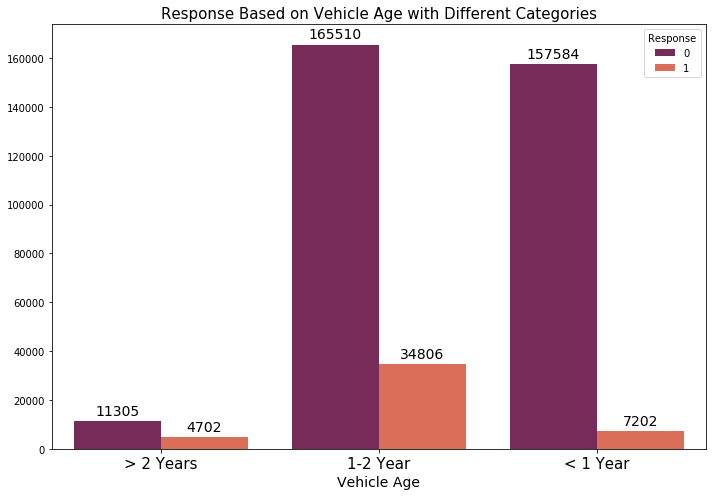

In [34]:
plt.figure(figsize=(10,7))
ax = sns.countplot(x='Vehicle_Age', data=database, hue='Response',palette='rocket')
ax.set_title('Response Based on Vehicle Age with Different Categories', fontsize=15)
ax.set_xlabel('Vehicle Age', fontsize= 14)
ax.set_ylabel('')
plt.xticks(fontsize=15)
plt.tight_layout()

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()),
                    xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                    xytext=(0, 3),fontsize=14,
                    textcoords="offset points",
                    ha='center', va='bottom')
plt.show()

### e) Vehicle Damage and Response

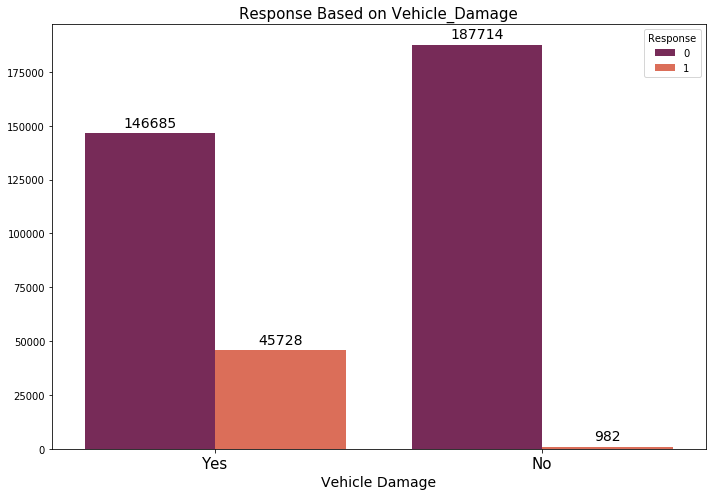

In [35]:
plt.figure(figsize=(10,7))
ax = sns.countplot(x='Vehicle_Damage', data=database, hue='Response',palette='rocket')
ax.set_title('Response Based on Vehicle_Damage', fontsize=15)
ax.set_xlabel('Vehicle Damage', fontsize= 14)
ax.set_ylabel('')
plt.xticks(fontsize=15)
plt.tight_layout()

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()),
                    xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                    xytext=(0, 3),fontsize=14,
                    textcoords="offset points",
                    ha='center', va='bottom')
plt.show()

## 4. Encoding for the Categorical Features

In [36]:
## 3. Correlation Matrix 

LE = preprocessing.LabelEncoder()
database['Gender'] = LE.fit_transform(database['Gender'])
database['Vehicle_Age'] = LE.fit_transform(database['Vehicle_Age'])
database['Vehicle_Damage'] = LE.fit_transform(database['Vehicle_Damage'])

## 5. Correlation Matrix

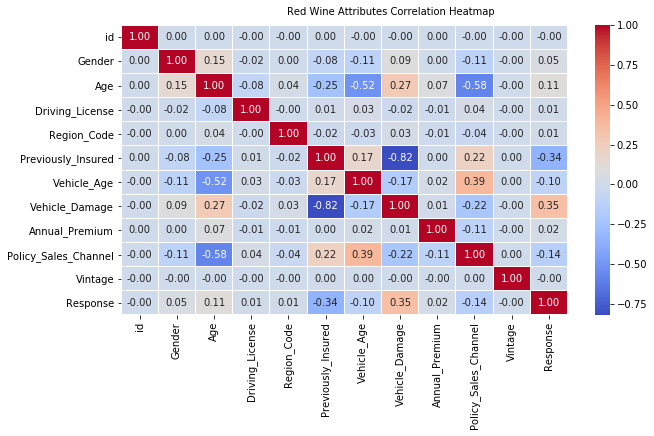

In [37]:
corr_database=database.corr()
corr_database=corr_database.round(2)

f, ax = plt.subplots(figsize=(10, 5))

hm = sns.heatmap(corr_database, annot=True, ax=ax, cmap="coolwarm",fmt='.2f', linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Red Wine Attributes Correlation Heatmap', fontsize=10)
plt.show()

## 6. Feature Selection

In [38]:
features = ['Gender','Age','Driving_License','Region_Code','Previously_Insured','Vehicle_Age','Vehicle_Damage','Annual_Premium','Policy_Sales_Channel','Vintage']

shuffled_database = database.reindex(np.random.permutation(database.index))
shuffled_database[features]=shuffled_database[features].astype(float)
X = shuffled_database[features]
y = shuffled_database['Response']

## 7. Train Test Split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

## 8.The Use of Random Forest Classifier

In [40]:
RF_Classifier= RandomForestClassifier(n_estimators = 50, max_depth= 13, random_state=20)
XGBoost_Classifier= XGBClassifier()

RF_Classifier.fit(X_train,y_train)
y_RF_pred=RF_Classifier.predict(X_test)
RF_Classifier_score=RF_Classifier.score(X_test,y_test)

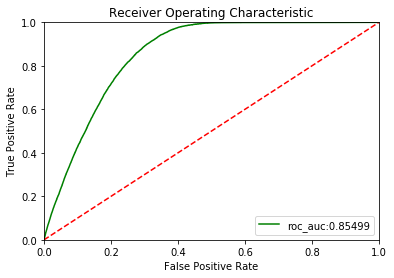

In [41]:
y_proba = RF_Classifier.predict_proba(X_test)[:,1]
roc_auc_score_=roc_auc_score(y_test,y_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'g' ,label = "roc_auc:" + round(roc_auc,5).astype(str))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [42]:
print(classification_report(y_test, y_RF_pred))
print("with train test split_RandomForestRegression", RF_Classifier_score)
print("with ROC_AUC_Result", roc_auc_score_)


              precision    recall  f1-score   support

           0       0.88      1.00      0.93    100301
           1       0.59      0.00      0.01     14032

    accuracy                           0.88    114333
   macro avg       0.73      0.50      0.47    114333
weighted avg       0.84      0.88      0.82    114333

with train test split_RandomForestRegression 0.8773669894081324
with ROC_AUC_Result 0.8549915552362986


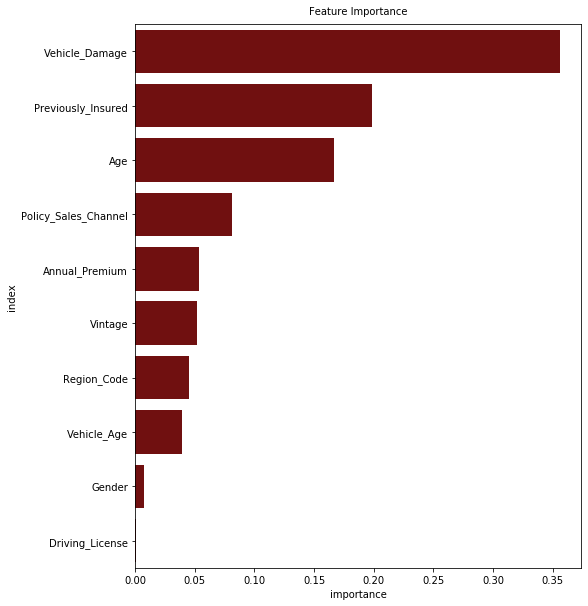

In [43]:
RF_feature_importances=RF_Classifier.feature_importances_

feature_importances = pd.DataFrame(RF_feature_importances,
                                   index = X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)


fig, ax = plt.subplots(1,1, figsize=(8,10))
sns.barplot(x='importance', y='index', color='#800000',data=feature_importances.reset_index());
plt.title('Feature Importance', fontsize=10, pad=10)
plt.show();


In [44]:
score_CV_RF_Classifier = cross_val_score(RF_Classifier,X,y,cv=5 )
print("with CV RF_Classifier=", score_CV_RF_Classifier.mean())



with CV RF_Classifier= 0.8774602541909466


## 9. Setting of Hyperparameter

In [45]:
param_grid_RF={ 
    'n_estimators'  : [15,20,25]            ,
    'criterion'     : ['gini', 'entropy']   ,
    'max_depth'     : [10,11,15,20,25]      ,
    'max_features'  : ['sqrt', 'log2']
}

param_grid_XGBoost={ 
    'n_estimators'  : [15,20,25,30]                 ,
    'learning_rate' : [0.1, 0.2, 0.3, 0.4, 0.5]     ,
    'max_depth'     : [10,11,15,20,25]              , 
}

## 10. Randomized Search for Random Forest

In [46]:
Randomized_Search_rfr=RandomizedSearchCV(RF_Classifier, param_distributions = param_grid_RF, cv=3)

Randomized_Search_rfr.fit(X_train,y_train)

print("Randomized_Search.Best_params_",Randomized_Search_rfr.best_params_)
print("Randomized_Search.Best_score_",Randomized_Search_rfr.best_score_)



Randomized_Search.Best_params_ {'n_estimators': 20, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'entropy'}
Randomized_Search.Best_score_ 0.8775077218446569


## 10. Randomized Search for XG Boost

In [47]:
Randomized_Search_XGBoost=RandomizedSearchCV(XGBoost_Classifier, param_distributions = param_grid_XGBoost, cv=3)

Randomized_Search_XGBoost.fit(X_train,y_train)

print("Randomized_Search for XGBoost_Best_estimator_",Randomized_Search_XGBoost.best_estimator_)
print("Randomized_Search for XGBoost_Best_params_",Randomized_Search_XGBoost.best_params_)
print("Randomized_Search for XGBoost.Best_score_",Randomized_Search_XGBoost.best_score_)

Randomized_Search for XGBoost_Best_estimator_ XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=11,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=30, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Randomized_Search for XGBoost_Best_params_ {'n_estimators': 30, 'max_depth': 11, 'learning_rate': 0.1}
Randomized_Search for XGBoost.Best_score_ 0.8773577828417164


## 11. Save the Estimator, Hyperparameter in the File

In [48]:
filename_Best_estimator = 'XG_Boost_Best_estimator.sav'
filename_Best_params = 'XG_Boost_Best_params.sav'
filename_Best_score = 'XG_Boost_Best_score.sav'

pickle.dump(Randomized_Search_XGBoost.best_estimator_, open(filename_Best_estimator, 'wb'))
pickle.dump(Randomized_Search_XGBoost.best_params_, open(filename_Best_params, 'wb'))
pickle.dump(Randomized_Search_XGBoost.best_score_, open(filename_Best_score, 'wb'))

# 12. Reference

1. Vehicle Insurance EDA and boosting models - https://www.kaggle.com/yashvi/vehicle-insurance-eda-and-boosting-models
2. Vehicle Insurance Predict Response XGBoost (87%) - https://www.kaggle.com/muhammadakbarulazis/vehicle-insurance-predict-response-xgboost-87